In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
from PIL import Image
from model import Generator, Discriminator

In [9]:
gen = Generator(in_channels=4, num_upsample_blocks=2, num_residual_blocks=16)
dis = Discriminator(input_channels=3)

In [29]:
img_path = "/Users/archismanchakraborti/Desktop/python_files/Super-Resolution-Tool/data/low_res_data/3_lr.png"
img = Image.open(img_path)


# Convert img to torch tensor 
img = np.array(img)
img_torch = torch.tensor(img).permute(2, 0, 1).unsqueeze(0).float()

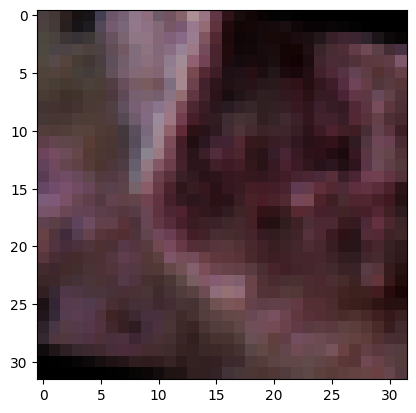

In [31]:
out_img = gen(img_torch)
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


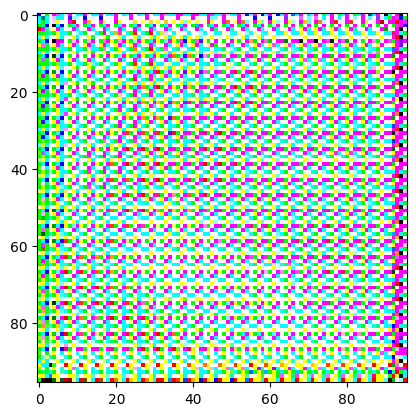

In [32]:
plt.imshow(out_img.detach().numpy().squeeze().transpose(1, 2, 0))